In [ ]:
# TS=("cloud computing" NEAR/5 ("event-driven architecture" OR "event-driven systems" OR "event-driven design" OR "event-driven model"))
# 16 registros

In [4]:
pip install pandas openpyxl matplotlib seaborn fuzzywuzzy networkx scikit-learn geopandas numpy ipython

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import matplotlib.image as mpimg
import geopandas as gpd
from fuzzywuzzy import process
import networkx as nx
from collections import Counter 
import numpy as np 
from IPython.display import SVG, display

In [34]:
df = pd.read_excel('datasets/atividade02/Q4.xlsx')
df.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

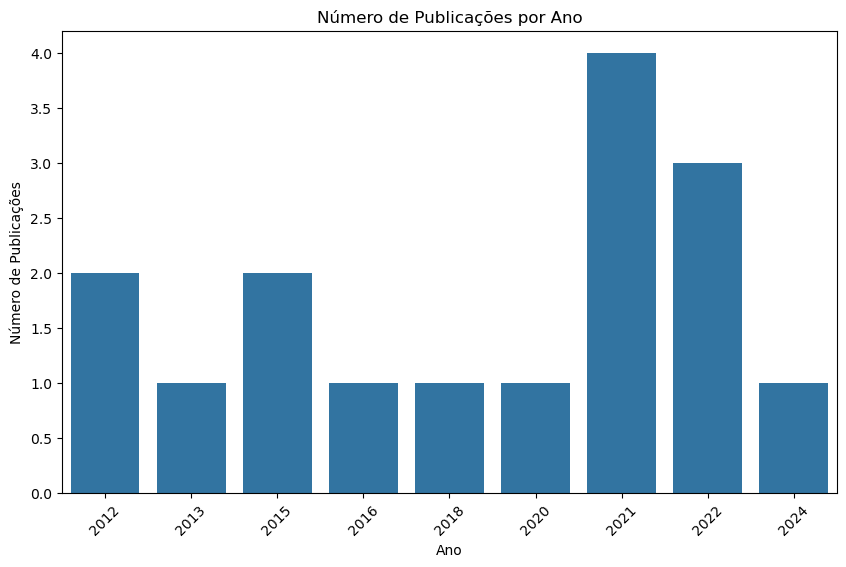

In [74]:
publicacoes_por_ano = df['Publication Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=publicacoes_por_ano.index, y=publicacoes_por_ano.values)
plt.title('Número de Publicações por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Publicações')
plt.xticks(rotation=45)
plt.show()

In [76]:

# Converter a coluna 'Publication Year' para tipo numérico, ignorando valores inválidos
df['Publication Year'] = pd.to_numeric(df['Publication Year'], errors='coerce')

# Remover linhas onde o ano de publicação é nulo
df = df.dropna(subset=['Publication Year'])

# Calcular a média de publicações por ano
media_publicacoes = df['Publication Year'].value_counts().sort_index()

# Criar a tabela com o ano e a média de publicações
tabela_media_publicacoes = media_publicacoes.reset_index()
tabela_media_publicacoes.columns = ['Ano', 'Número de Publicações']
print(tabela_media_publicacoes)

    Ano  Número de Publicações
0  2012                      2
1  2013                      1
2  2015                      2
3  2016                      1
4  2018                      1
5  2020                      1
6  2021                      4
7  2022                      3
8  2024                      1


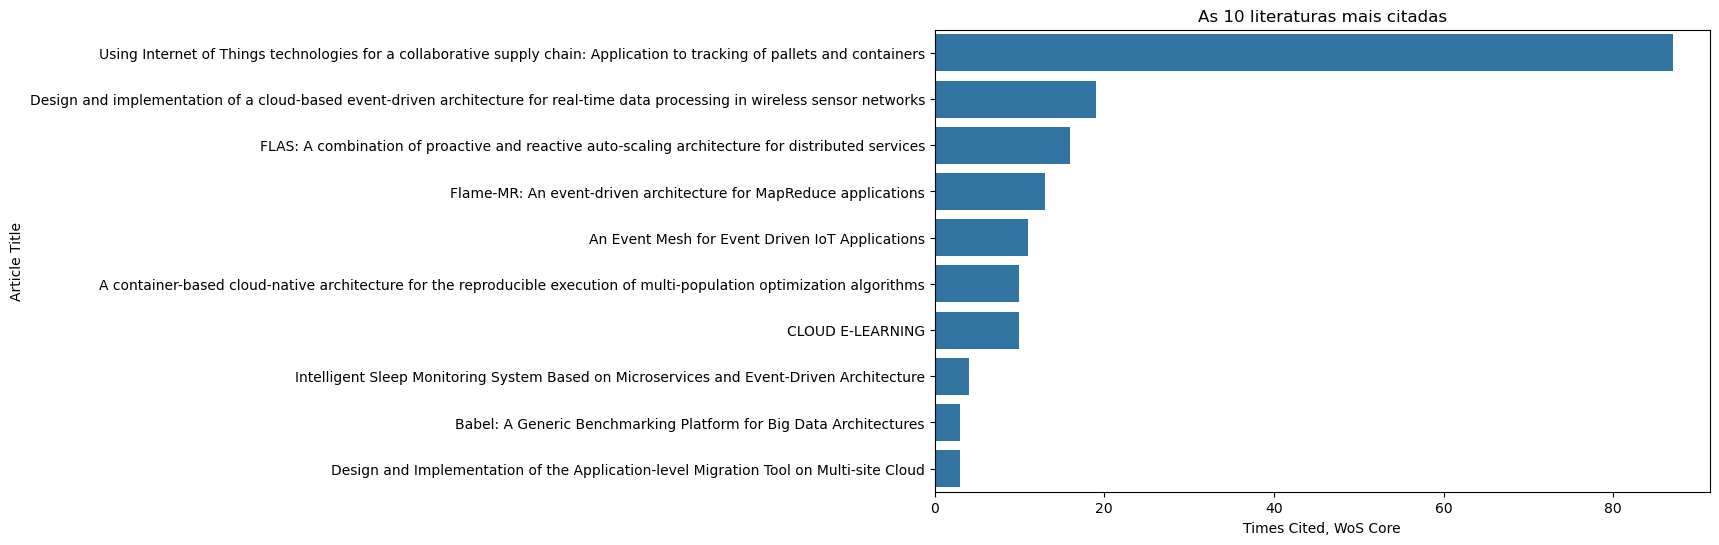

In [78]:
# 1. As 10 literaturas mais citadas

literature_data = df[['Article Title', 'Times Cited, WoS Core']].sort_values('Times Cited, WoS Core', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Times Cited, WoS Core', y='Article Title', data=literature_data)
plt.title('As 10 literaturas mais citadas')
plt.show() 

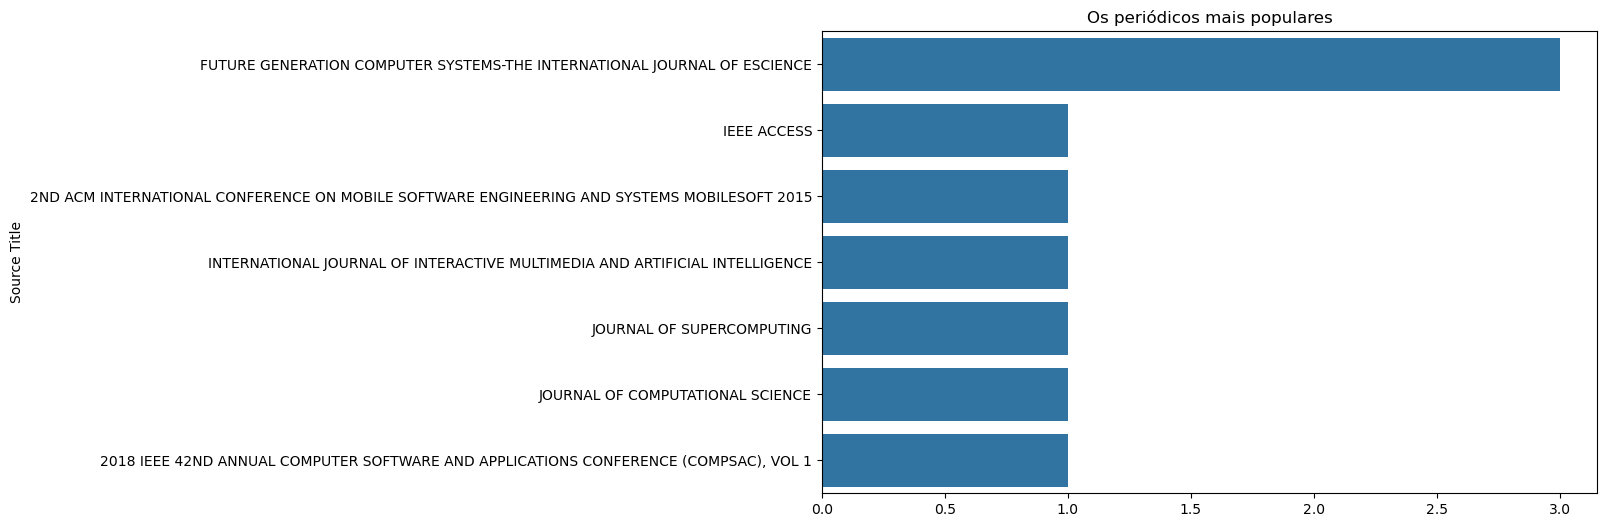

In [80]:
# 2. Os periódicos mais populares

journal_data = df['Source Title'].value_counts().head(7)
plt.figure(figsize=(10,6))
sns.barplot(x=journal_data.values, y=journal_data.index)
plt.title('Os periódicos mais populares')
plt.show() 

             Author  Publication Count
0       Surantha, N                  1
1             An, B                  1
2           Cao, DG                  1
3     Torkashvan, M                  1
4       Haghighi, H                  1
5        Valdez, MG                  1
6      Guervós, JJM                  1
7     Gnimpieba, DR                  1
8  Nait-Sidi-Moh, A                  1
9         Durand, D                  1


/var/folders/3b/wr0ldr2n5ggbhcf71_q8cv600000gn/T/ipykernel_1954/2455284003.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Publication Count', y='Author', data=author_df, palette='viridis', dodge=False)


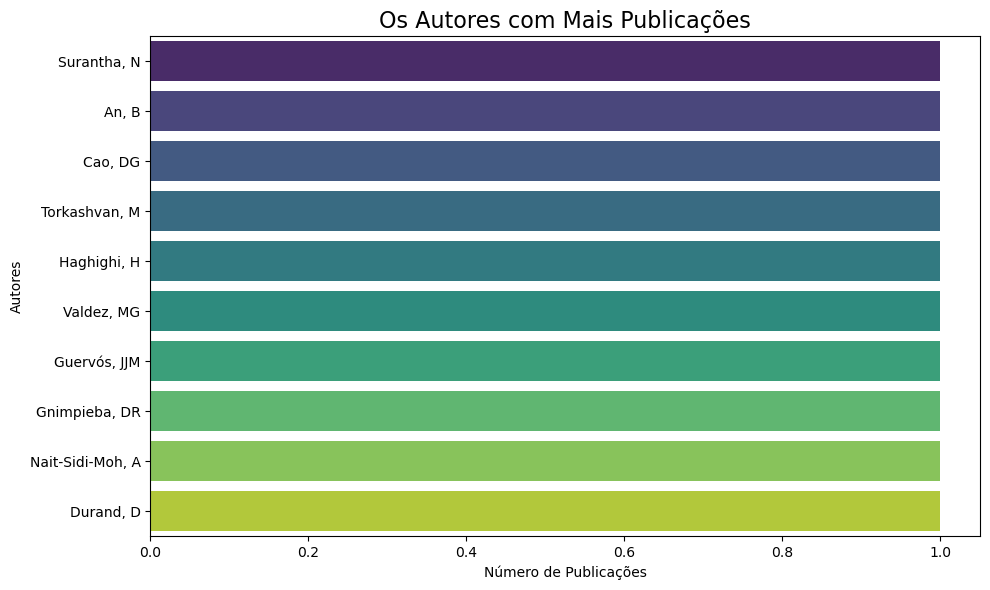

In [98]:
df_temp = df.copy()

# Separar os autores em uma lista e explodir a coluna para ter um autor por linha
df_temp['Authors'] = df_temp['Authors'].str.split('; ')
df_temp = df_temp.explode('Authors')

# Remover duplicatas para garantir que cada autor conte apenas uma vez por publicação
df_unique = df_temp.drop_duplicates(subset=['Authors', 'Article Title'])

# Contar o número de publicações por autor
author_data = df_unique['Authors'].value_counts().head(10)

# Converter para DataFrame e renomear as colunas
author_df = author_data.reset_index()
author_df.columns = ['Author', 'Publication Count']

# Exibir o DataFrame de autores com contagem de publicações
print(author_df)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Publication Count', y='Author', data=author_df, palette='viridis', dodge=False)
plt.title('Os Autores com Mais Publicações', fontsize=16)
plt.xlabel('Número de Publicações')
plt.ylabel('Autores')
plt.tight_layout()
plt.show()

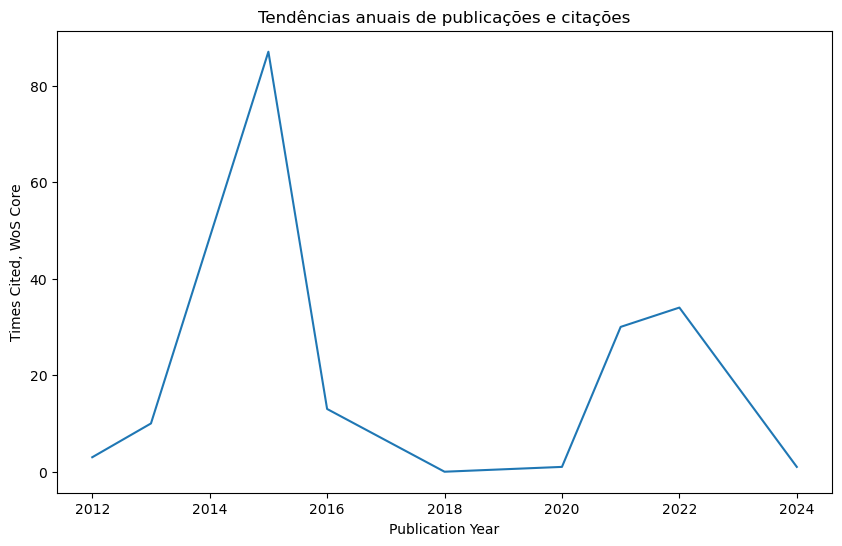

In [86]:
# 4. Tendências anuais de publicações e citações
yearly_trend = df.groupby('Publication Year')['Times Cited, WoS Core'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='Publication Year', y='Times Cited, WoS Core', data=yearly_trend)
plt.title('Tendências anuais de publicações e citações')
plt.show() 

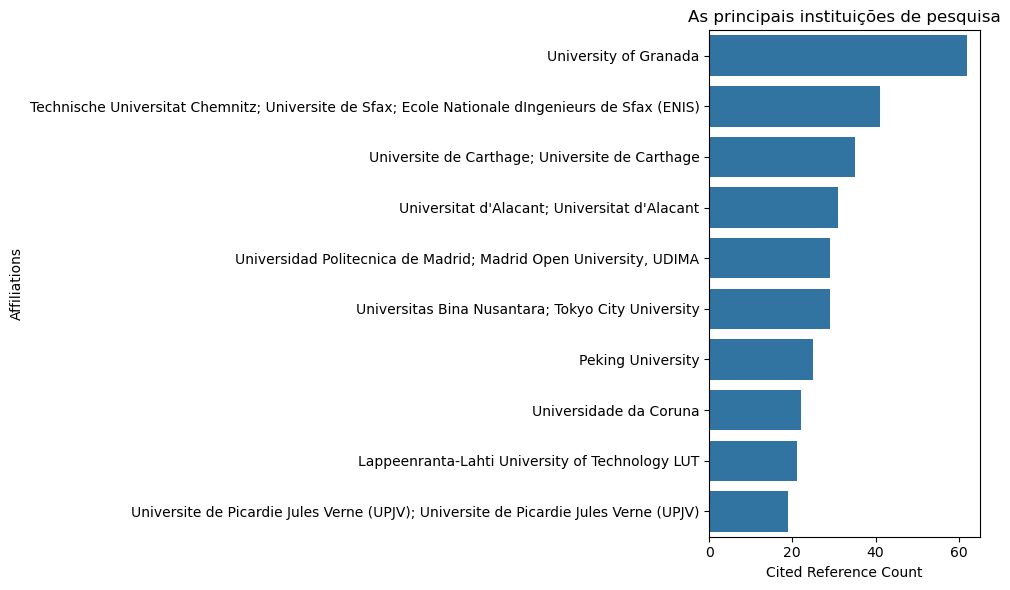

In [88]:
# Principais instituicoes de pesquisa
top_institutions = df[['Affiliations', 'Cited Reference Count']].groupby('Affiliations').sum().nlargest(10, 'Cited Reference Count').reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Cited Reference Count', y='Affiliations', data=top_institutions)
plt.title('As principais instituições de pesquisa')
plt.xlabel('Cited Reference Count')
plt.ylabel('Affiliations')
plt.tight_layout()
plt.show()


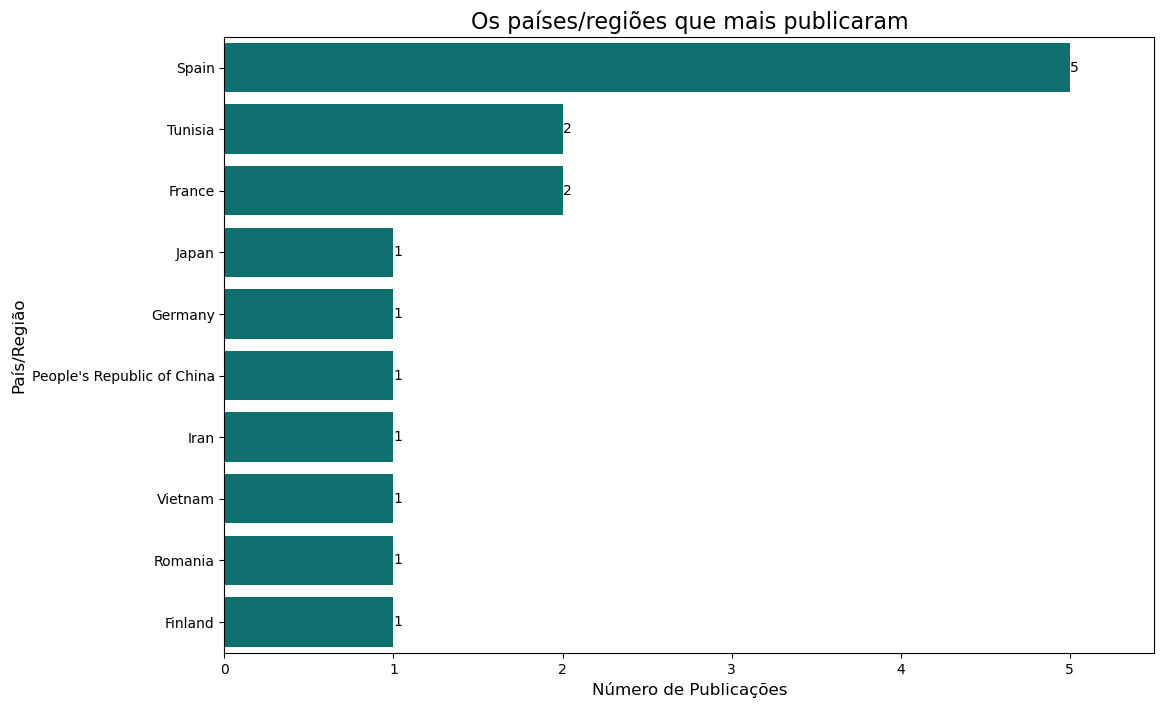

In [90]:
def clean_country_name(name):
    name = name.strip()
    if 'USA' in name:
        return 'United States'
    if 'R China' in name:
        return 'People\'s Republic of China'
    return name

countries_data = df['Addresses'].fillna('').apply(lambda x: str(x).split(',')[-1].strip())
countries_data = countries_data.map(clean_country_name).value_counts().head(10)

plt.figure(figsize=(12, 8))

sns.barplot(x=countries_data.values, y=countries_data.index, color='teal')  

plt.title('Os países/regiões que mais publicaram', fontsize=16)
plt.xlabel('Número de Publicações', fontsize=12)
plt.ylabel('País/Região', fontsize=12)

for index, value in enumerate(countries_data.values):
    plt.text(value, index, f'{value}', va='center')

plt.xlim(0, countries_data.max() * 1.1) 
plt.show()


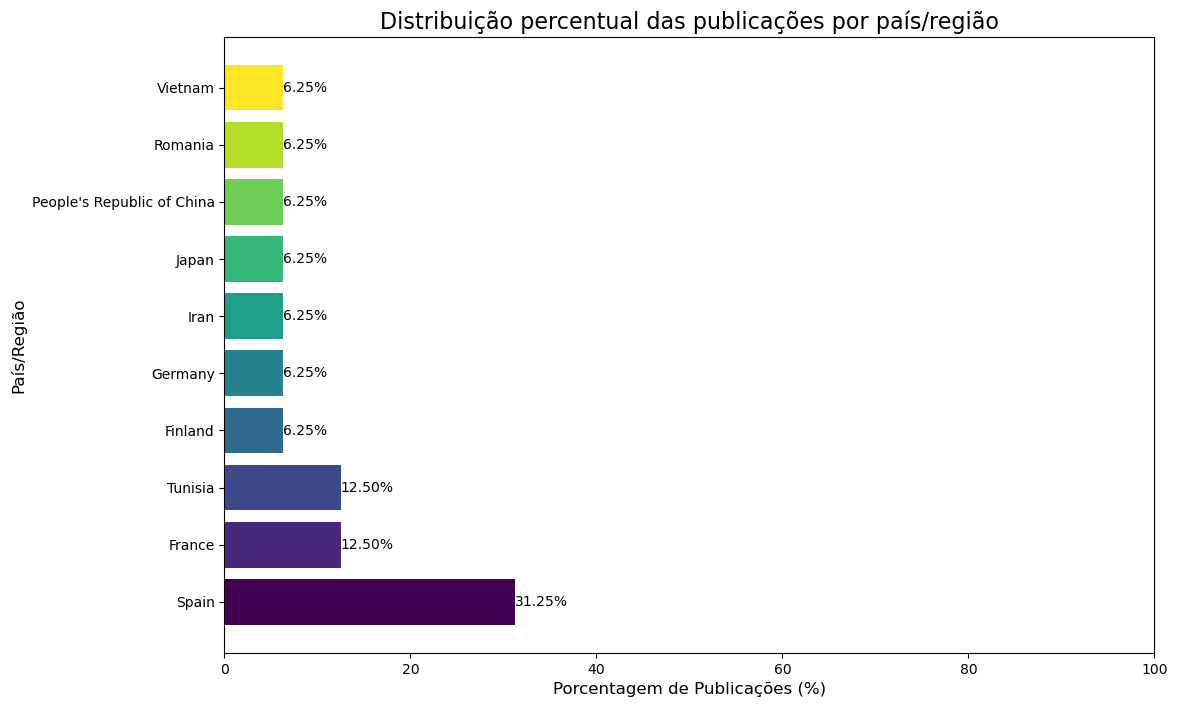

In [92]:
countries_data = df['Addresses'].fillna('').apply(lambda x: str(x).split(',')[-1].strip()).value_counts()

countries_data.index = countries_data.index.map(clean_country_name)

countries_data = countries_data.groupby(countries_data.index).sum()

total_publications = countries_data.sum()
countries_percentage = (countries_data / total_publications) * 100

countries_percentage = countries_percentage[countries_percentage > 0.5]

countries_percentage = countries_percentage.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(countries_percentage))) 
bars = plt.barh(countries_percentage.index, countries_percentage.values, color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center')

plt.title('Distribuição percentual das publicações por país/região', fontsize=16)
plt.xlabel('Porcentagem de Publicações (%)', fontsize=12)
plt.ylabel('País/Região', fontsize=12)
plt.xlim(0, 100)  
plt.axvline(0, color='grey', linewidth=0.8) 
plt.show()


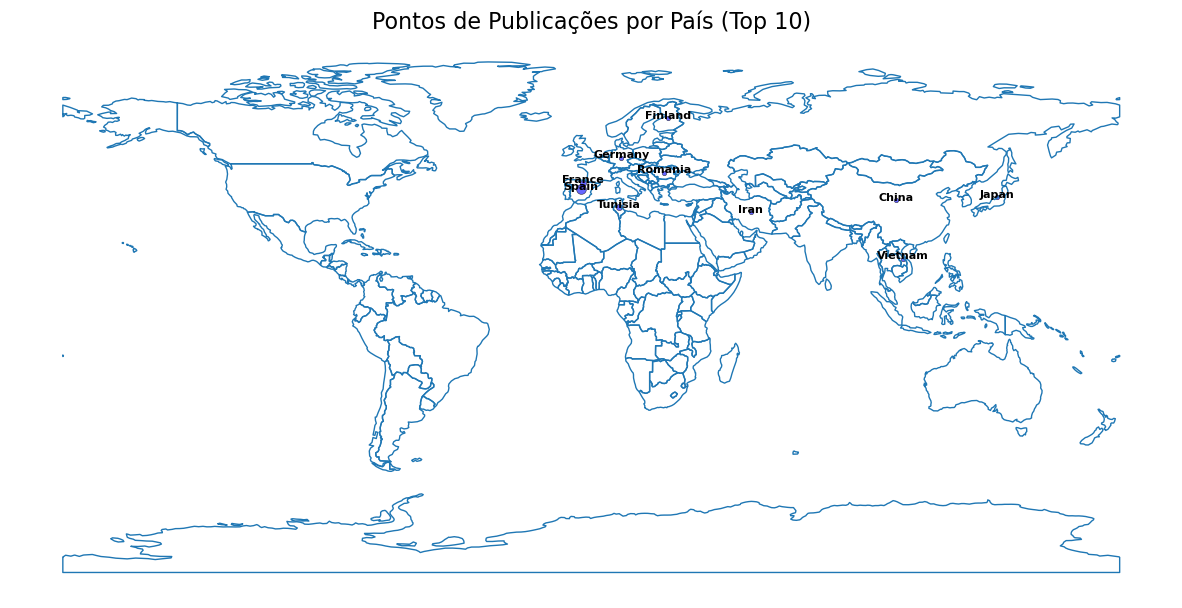

In [94]:

 

world = gpd.read_file('datasets/map/ne_110m_admin_0_countries.shp')

countries_data = df['Addresses'].fillna('').apply(lambda x: str(x).split(',')[-1].strip())
countries_data = countries_data.map(clean_country_name).value_counts()

countries_df = pd.DataFrame(countries_data).reset_index()
countries_df.columns = ['Country', 'Publication Count']

top_countries_df = countries_df.nlargest(10, 'Publication Count')

world['ADMIN'] = world['ADMIN'].str.strip().str.title()

def get_best_match(country_name, choices):
    if not country_name:  
        return None
    match, score = process.extractOne(country_name, choices)
    return match if score >= 80 else None  

geo_countries = world['ADMIN'].unique()

top_countries_df['Country'] = top_countries_df['Country'].apply(lambda x: get_best_match(x, geo_countries))

top_countries_df = top_countries_df.dropna(subset=['Country'])

merged = world.merge(top_countries_df, how="left", left_on="ADMIN", right_on="Country")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax, linewidth=1)

for idx, row in merged.iterrows():
    if row['Publication Count'] > 0:
        ax.scatter(*row.geometry.centroid.coords[0], 
                   s=row['Publication Count'] * 10, 
                   alpha=0.6, color='blue', edgecolor='k', linewidth=0.5)
        ax.annotate(text=row['Country'], 
                    xy=row.geometry.centroid.coords[0], 
                    ha='center', fontsize=8, color='black', weight='bold')

plt.title('Pontos de Publicações por País (Top 10)', fontsize=16)
plt.axis('off') 
plt.show()


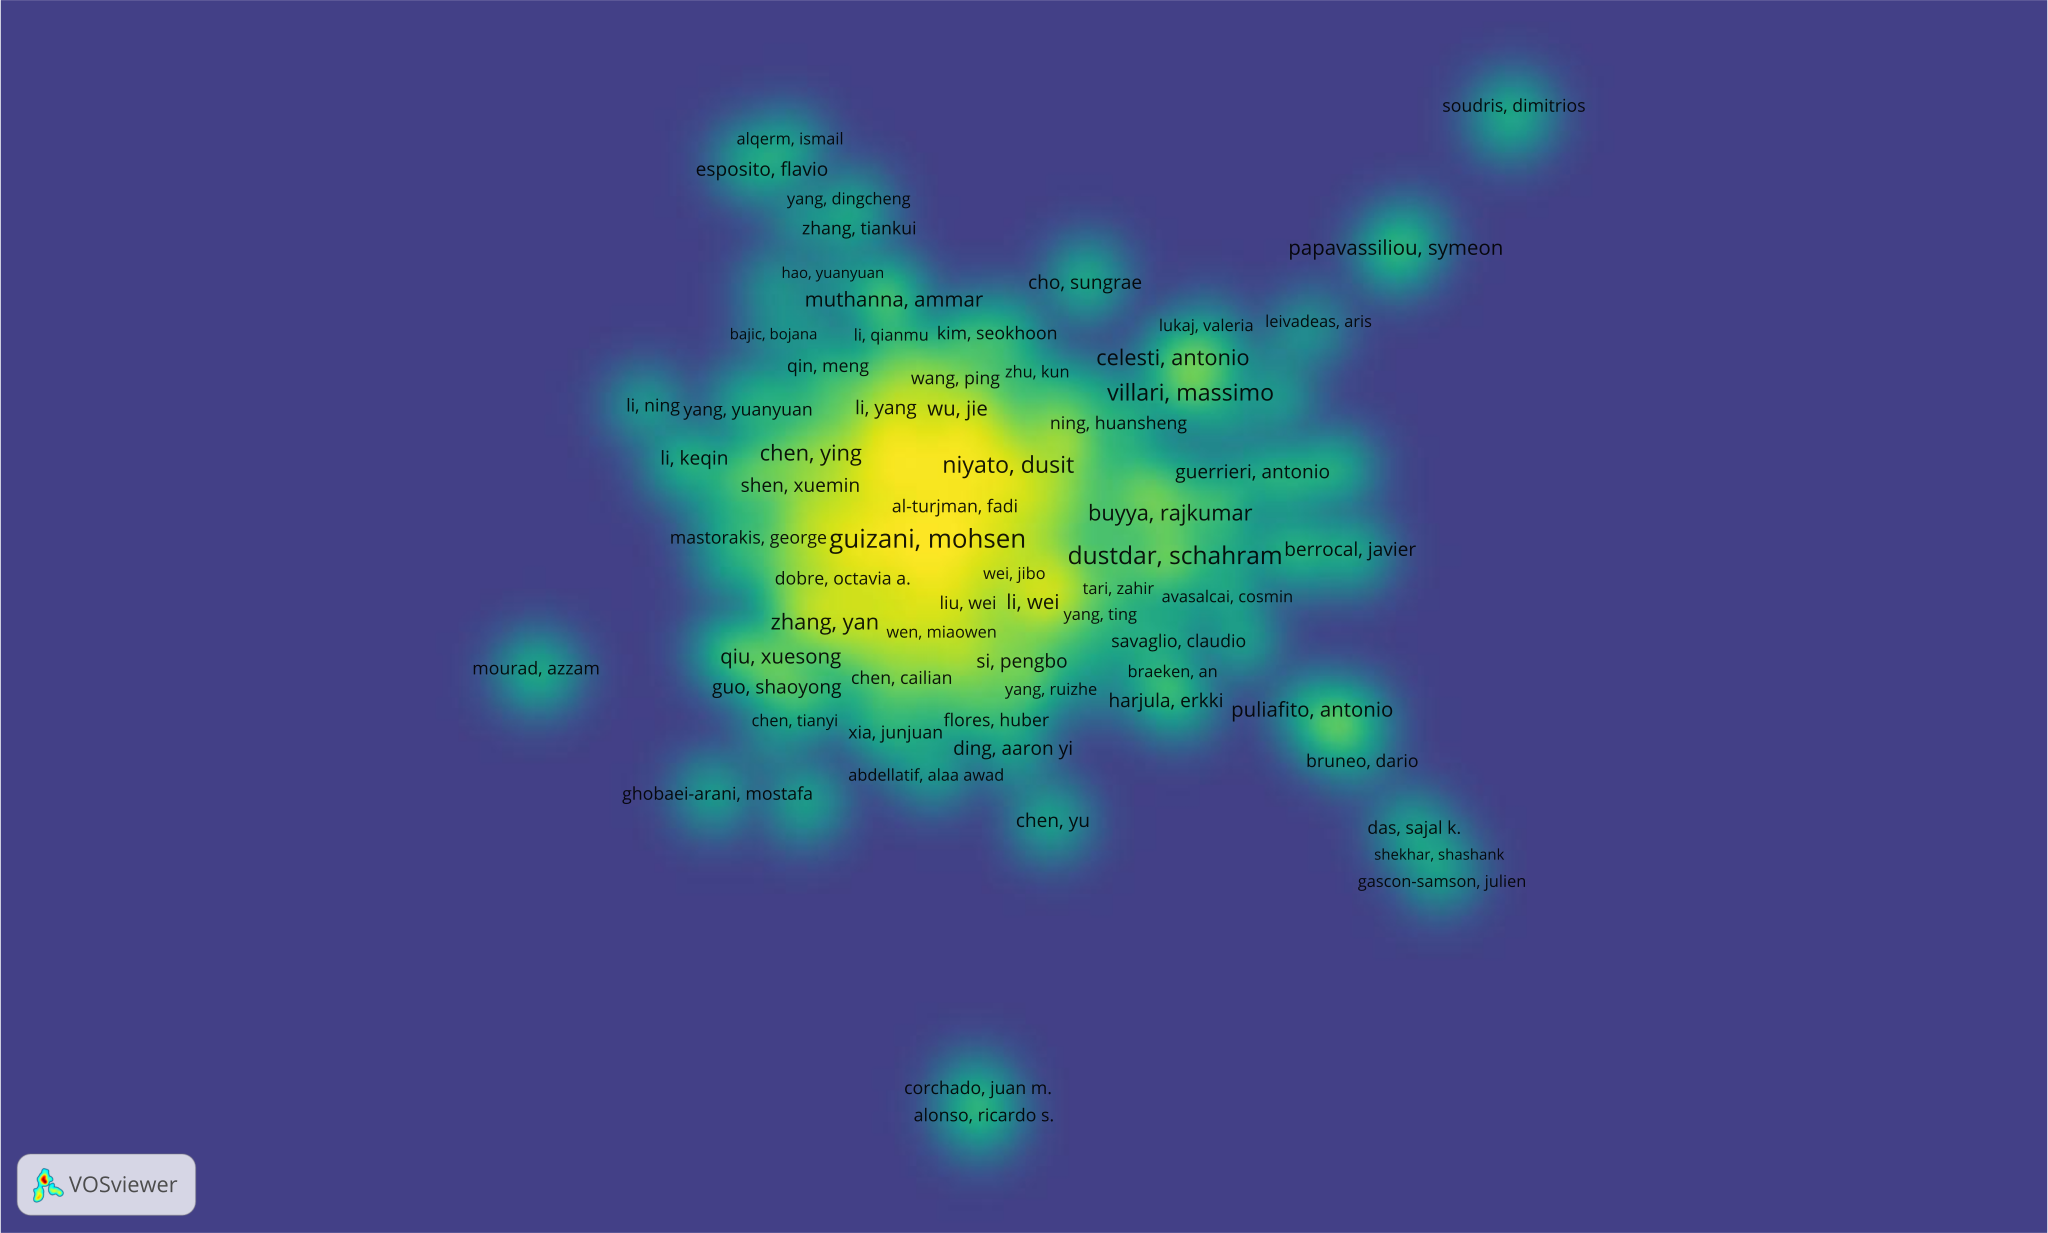

In [65]:
#Mapa de calor de co-authors
file_path = "imgs/co-author-density.svg"
display(SVG(filename=file_path))

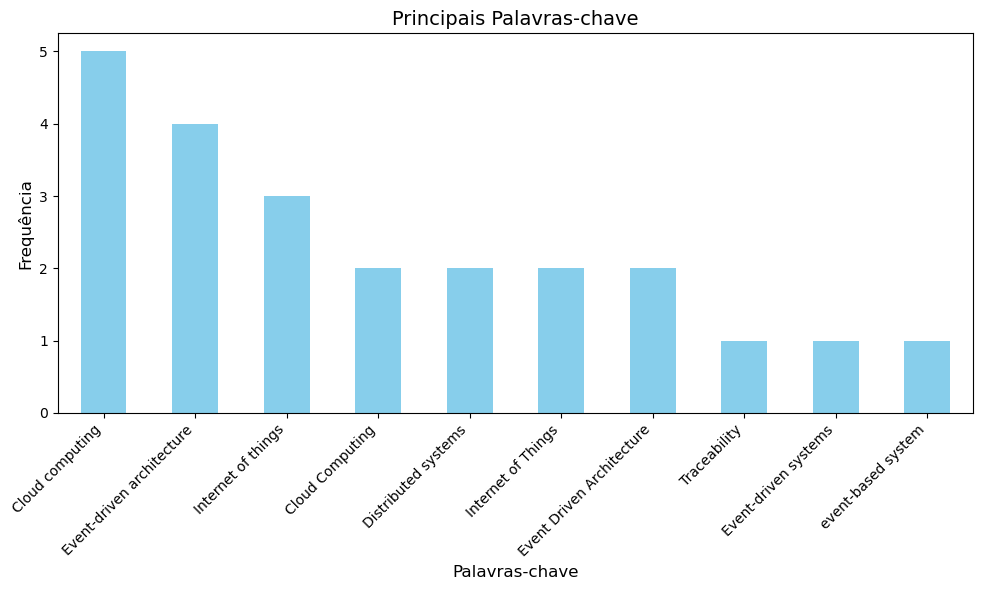

In [96]:
df_temp = df['Author Keywords'].dropna()

df_temp = df_temp.str.split(';')

df_keywords = df_temp.explode()

df_keywords = df_keywords.str.strip()

keyword_counts = df_keywords.value_counts()

top_keywords = keyword_counts.index.tolist()[:10] 

plt.figure(figsize=(10, 6))
keyword_counts.head(10).plot(kind='bar', color='skyblue')

plt.title('Principais Palavras-chave', fontsize=14)
plt.xlabel('Palavras-chave', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
